In [1]:
import eq_resilience_library
import pandas as pd
import plotly as plt
import numpy as np
import os 
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

# Import data from EarthPy
data = et.data.get_data('colorado-flood')

C:\Users\Bence\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\earthpy\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [2]:
latitude = 43.7874
longitude = 11.2499

soil_category = 'A'
nominal_life = 50
topographic_category = 'T1'
importance_class = 'I'

file_path = "../../demo/data/EQ_resilience/EPUSH_new_format.xlsx"
file = pd.ExcelFile(file_path)

In [4]:
ParaTR, city, country = eq_resilience_library.get_Parameters(latitude longitude)
print("{}, {}".format(city, country))
if ParaTR is None:
    print("Earthquake hazard calculation is not supported in the selected region. Please add Italian coordinates or upload the return period parameters in a CSV file below.")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1889664061.py, line 1)

In [4]:
f = eq_resilience_library.get_map(latitude, longitude, city, country)
f.save('map.html')
f

In [5]:
ParaTR

,Return Period,ag,Fo,Tc*
0,30.0,0.047018,2.551014,0.252808
1,50.0,0.056464,2.586081,0.267521
2,72.0,0.064100,2.593636,0.276378
3,101.0,0.072345,2.590411,0.281871
4,140.0,0.080685,2.597692,0.287275
5,201.0,0.093504,2.531818,0.293817
6,475.0,0.131090,2.420610,0.301819
7,975.0,0.167652,2.390029,0.310319
8,2475.0,0.221719,2.411010,0.318801


Layout

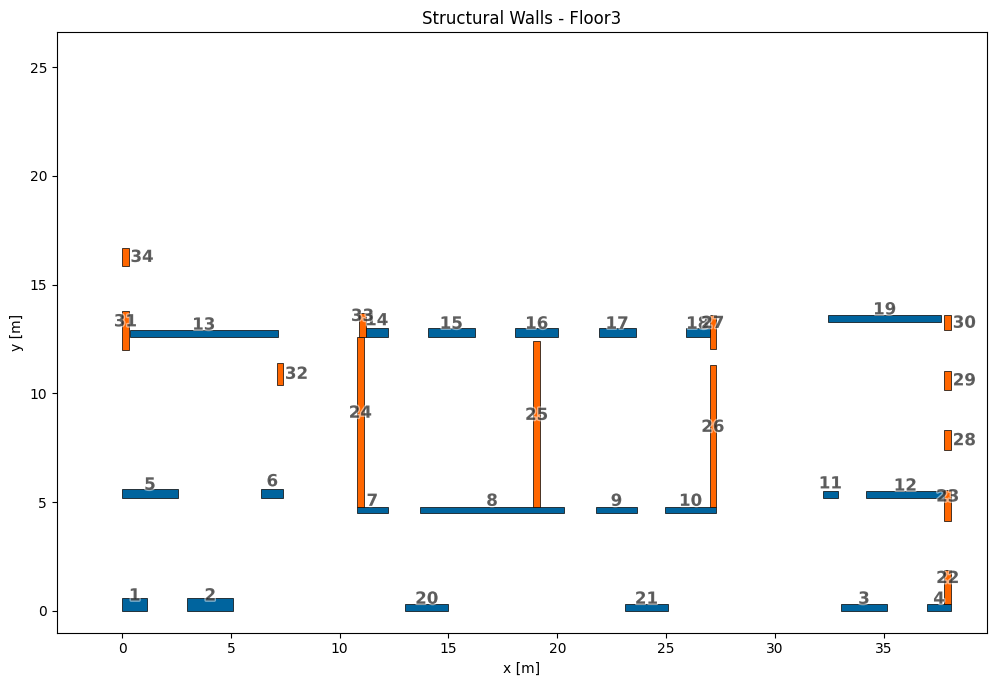

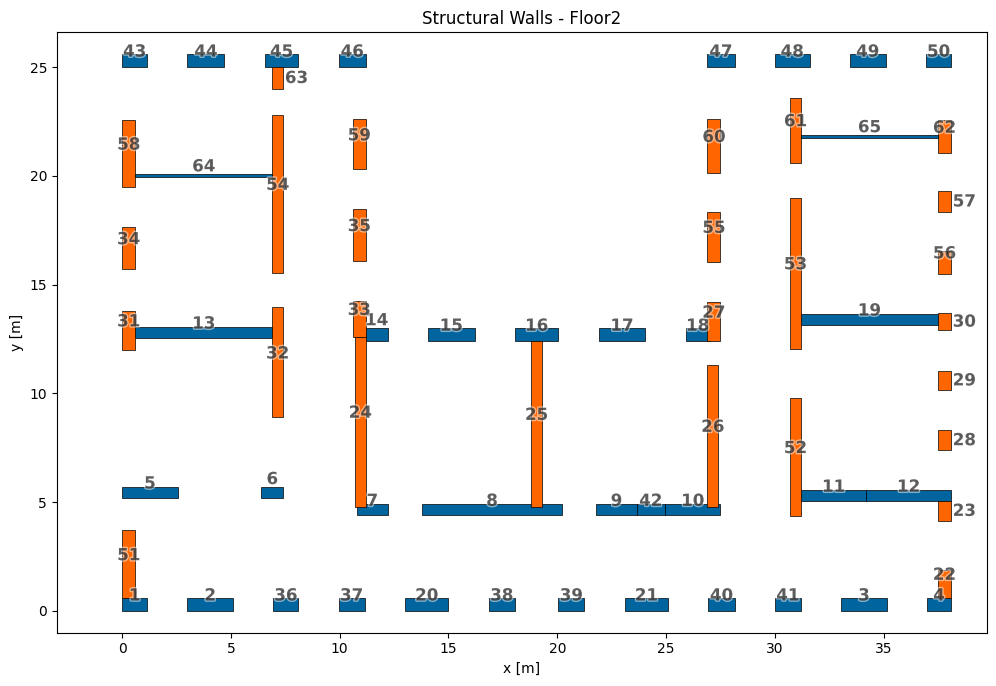

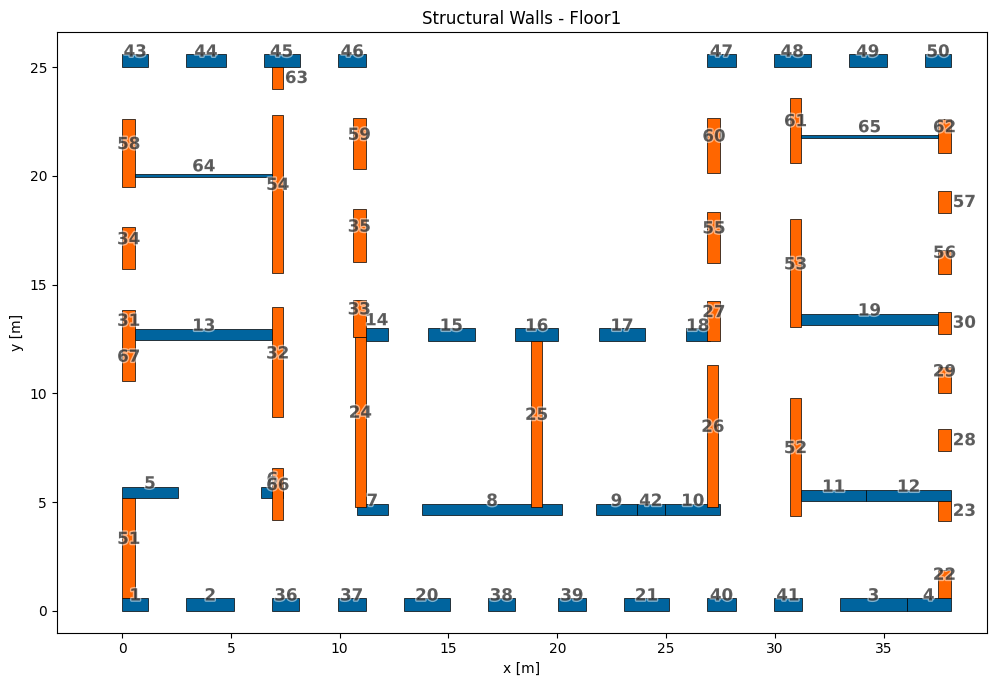

In [6]:
n_floors, n_walls_per_floor, dimensions, center_coordinates, alpha  = eq_resilience_library.get_data_for_2d_layout(file)
figures = eq_resilience_library.plot_wall_resistance(center_coordinates, dimensions, alpha, n_floors)

Linear analysis calculation

In [7]:
behaviour_factor_q = 1.5

IR_fess_X, IR_fess_Y, IR_pf_X, IR_pf_Y, IR_pf_ort_X, IR_pf_ort_Y = eq_resilience_library.linear_static_analysis(file, ParaTR, soil_category, topographic_category, nominal_life, importance_class, behaviour_factor_q)

Linear analysis layout

Direction Y, floor 1  Wall ID  Shear  Bending in plane  Bending out of plane
0                        21.0   1.18              1.05                  1.85
1                        22.0   1.11              0.69                  1.75
2                        23.0   1.21              6.41                  1.57
3                        24.0   1.25              6.43                  1.61
4                        25.0   1.09              4.90                  1.44
5                        26.0   1.00              1.27                  1.57
6                        27.0   0.90              0.59                  1.36
7                        28.0   0.89              0.70                  1.34
8                        29.0   0.87              0.56                  1.29
9                        30.0   1.04              1.32                  1.63
10                       31.0   1.03              3.56                  1.34
11                       32.0   1.01              1.18                  1.59

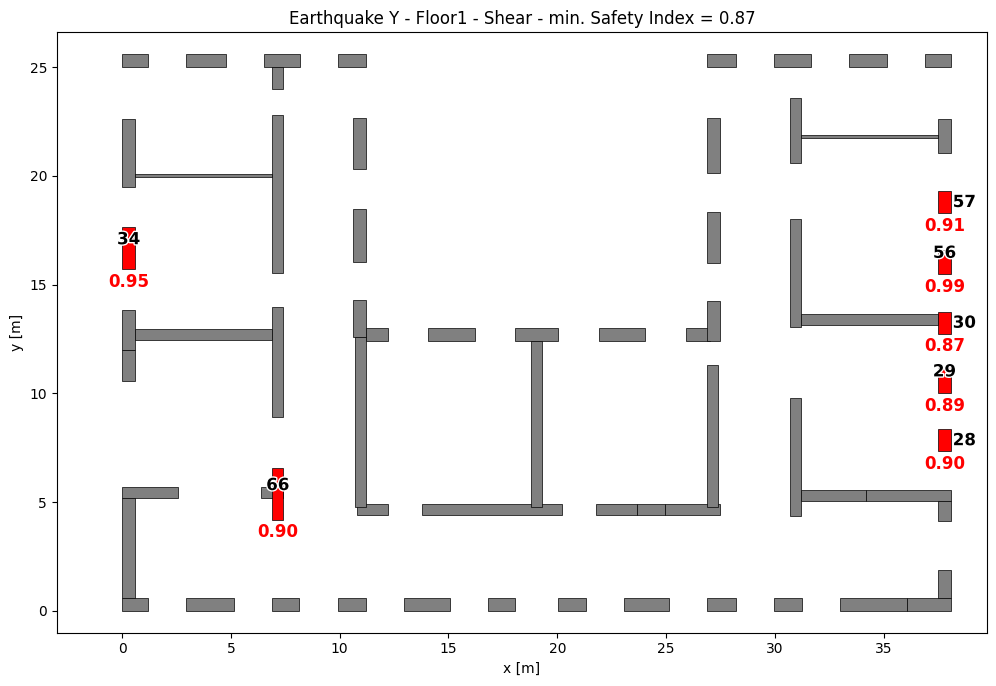

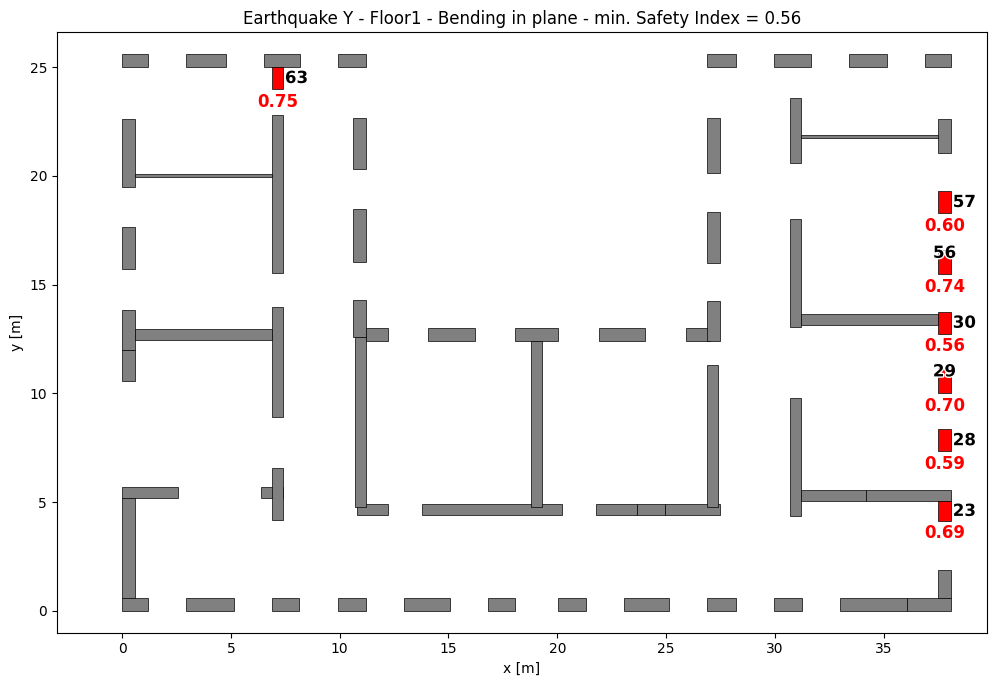

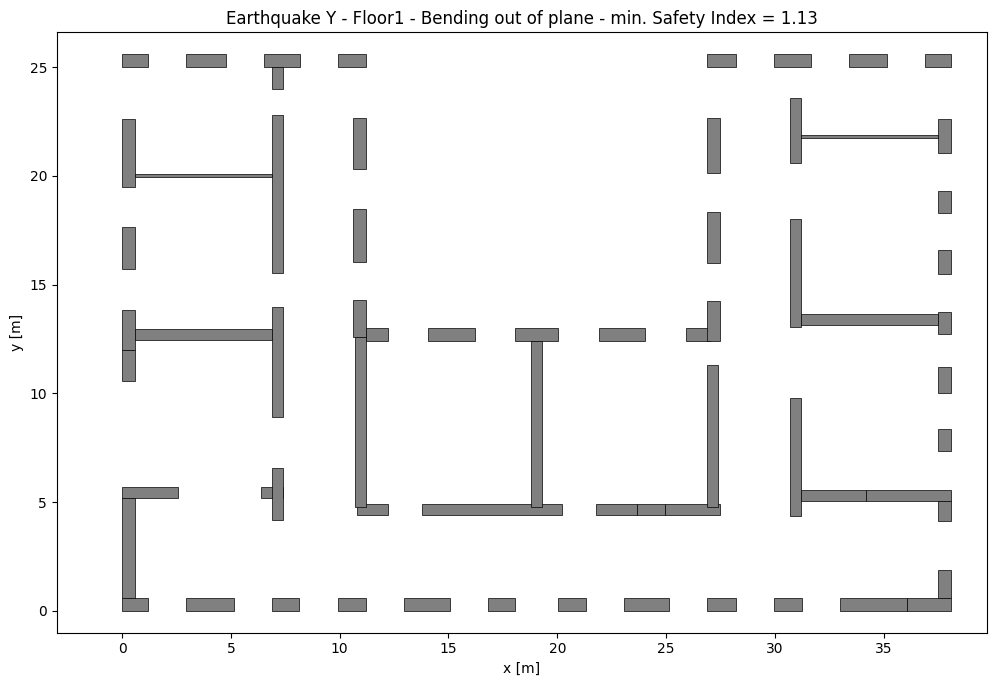

In [8]:
# failure_mechanism = 'Shear'
direction = 'Y'
chosen_floor = 1

linear_dataframes = eq_resilience_library.get_linear_dataframes(direction, IR_fess_X, IR_fess_Y, IR_pf_X, IR_pf_Y, IR_pf_ort_X, IR_pf_ort_Y, chosen_floor=chosen_floor)
print(linear_dataframes)
linear_analysis_figures = eq_resilience_library.choose_linear_analysis_plot(file, direction, IR_fess_X, IR_fess_Y, IR_pf_X, IR_pf_Y, IR_pf_ort_X, IR_pf_ort_Y, chosen_floor=chosen_floor)

Pushover analysis calculation

In [9]:
check_type = 'Ductility check'

vr_ult_TOT, Hult_TOT, x_coordinates, y_coordinates, ADRS, Sda, Saa, delta_ult_eq, S_eq, dxstar_t, Tr, IR, ADRS_TR, Sda_TR, Saa_TR, ag_Tr, L = eq_resilience_library.pushover_analysis_calculation(file, ParaTR, soil_category, topographic_category, nominal_life, importance_class, check_type)
eq_resilience_library.get_pushover_dataframe(x_coordinates, dxstar_t, Tr, ag_Tr, IR)

c:\Users\Bence\new_sglib_ttb\sglib_ttb\libraries\earthquake_resilience\eq_resilience_library.py:1697: RuntimeWarning: invalid value encountered in scalar divide
  delta0[i]=H0[i]/K0[i,k]


,Direction,Safety Index,PGA_C,TR,δ,d* (t)
0,X,1.28,0.15,660.0,16.68,16.13
1,Y,1.29,0.15,673.0,17.29,15.21


Pushover analysis plots

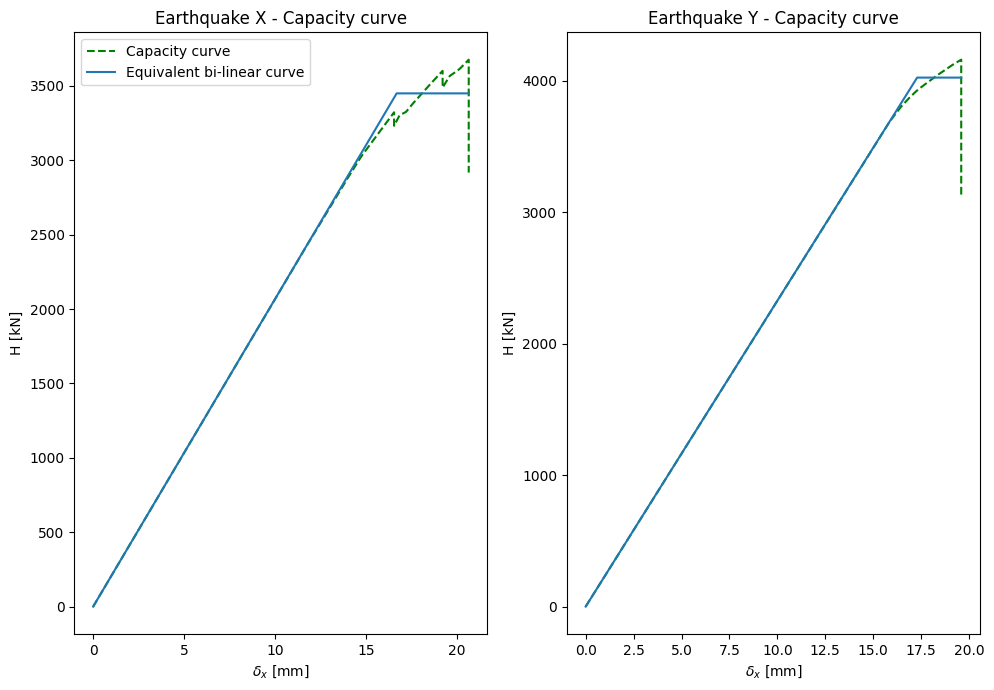

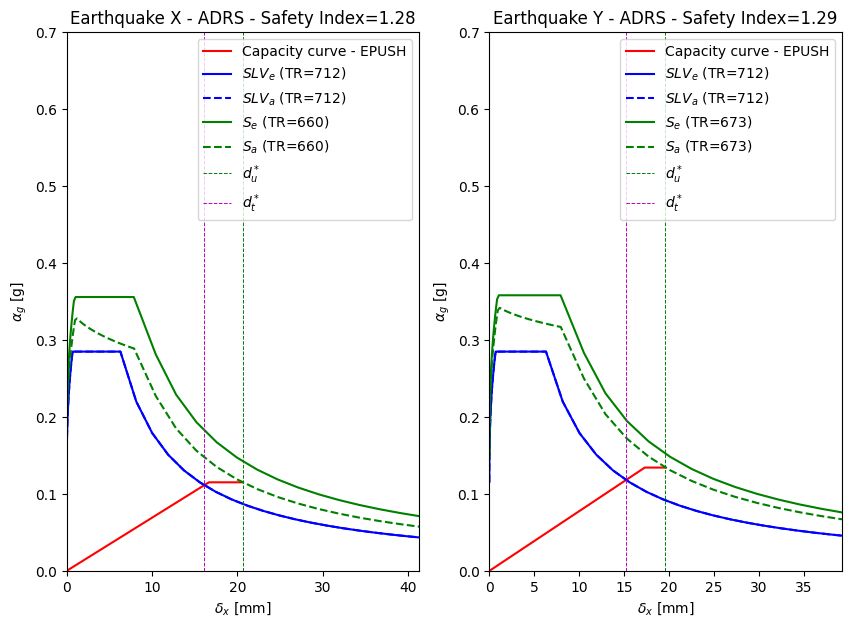

In [10]:
figures = eq_resilience_library.global_pushover_plot(vr_ult_TOT, Hult_TOT, ADRS, Sda, Saa, delta_ult_eq, S_eq, dxstar_t, Tr, IR, ADRS_TR, Sda_TR, Saa_TR)

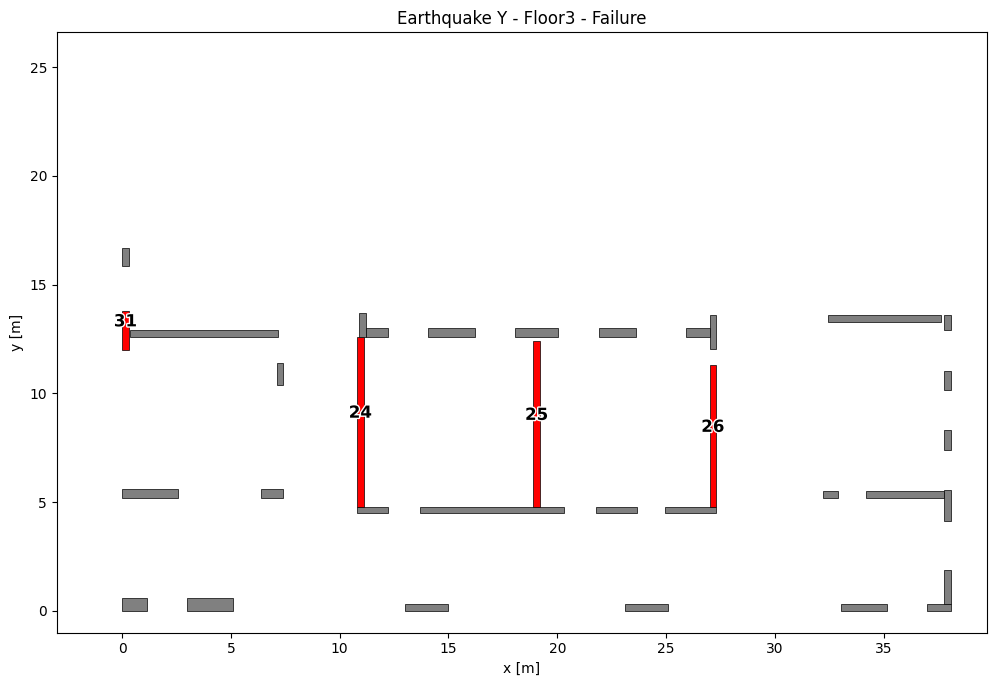

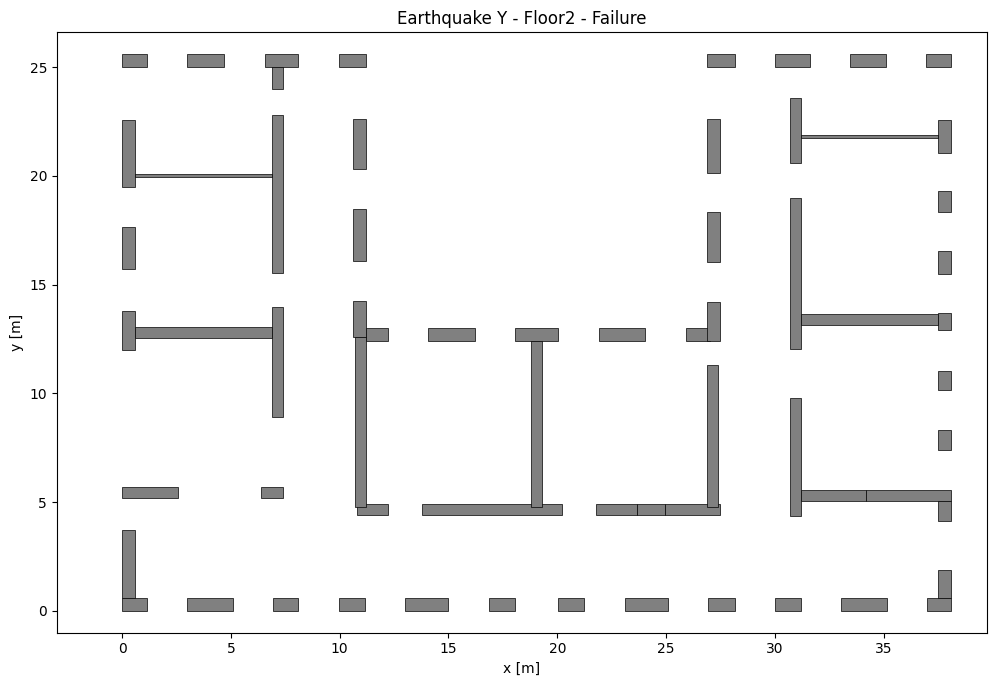

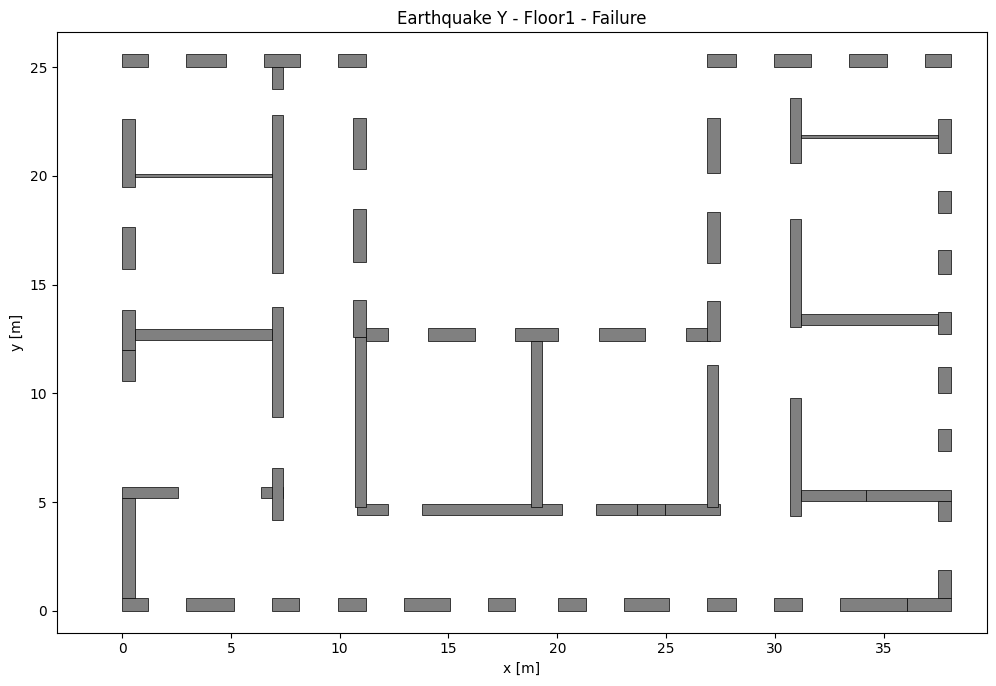

In [11]:
direction = 'Y'

figures = eq_resilience_library.plot_wall_failures(file, direction, L)

In [ ]:
n_floors, piani, _, alt_s, _, Masse, red_F = eq_resilience_library.get_data_from_description_sheet(file)
D, X, S, V, alpha, mud, G, d, NZ = eq_resilience_library.get_data_from_floor_sheets(file, n_floors)

freq, eigenvectors, C = eq_resilience_library.calculate_eigenfrequencies_and_eigenvectors(D,X,S,V,G,n_floors,NZ,Masse,alpha)

In [11]:
print('Frequencies:')
print(freq[0])
print(freq[1])
print('Eigenvectors:')
print(eigenvectors[0])
print(eigenvectors[1])
print('C_X, C_Y:')
print(C[0])
print(C[1])

Frequencies:
[1.52316848 3.97093539 6.5050208 ]
[1.26882135 4.18052232 6.91052217]
Eigenvectors:
[[ 0.41285111 -0.60774436  0.08641961]
 [ 0.6171583   0.3351811  -0.39676015]
 [ 0.66982803  0.71993085  0.91384519]]
[[ 0.4920241  -0.52483765  0.09577144]
 [ 0.59990302  0.35999586 -0.41388016]
 [ 0.63089512  0.77132899  0.90527954]]
C_X, C_Y:
[[ 9720107.78131668 -5153566.21596291        0.        ]
 [-5153566.21596291 10402396.02369491 -5111460.57305276]
 [       0.         -5111460.57305276  5154940.00252057]]
[[ 9226009.42697291 -6410381.72782625        0.        ]
 [-6410381.72782625 12102238.49941193 -5572539.49216363]
 [       0.         -5572539.49216363  5610305.20620459]]
